# Depositional mechanics with python

Hoy aprenderemos como usar python para simular un modelo 2D de deposicion/erosion en un rio

Las librerias que usaremos son `numpy, maplotlib, seaborn, pandas`.

Las [slides para la presentacion estan aqui](https://docs.google.com/presentation/d/12Kx96Auxgq_vJuZCQK21aLqQSgJL3AkN/edit?usp=sharing&ouid=118190230180154301607&rtpof=true&sd=true)

Las herramientas que nesecitamos:
1. Un heatmap para mostrar las diferencias de elevacion en la superficie.
2. Un campo vectorial para representar el flujo de sedimento. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


***

### Creating a heatmap with seaborn
Un heatmap es una grafico en 2D que usa color para representar una tercera dimension. Un ejemplo se ve asi

<AxesSubplot:>

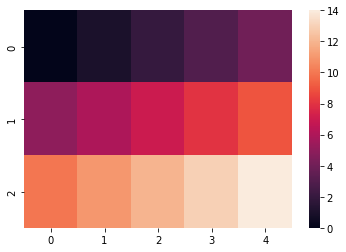

In [2]:
heat=[
    [0,1,2,3,4],
    [5,6,7,8,9],
    [10,11,12,13,14]]

sns.heatmap(heat)

## Question 1 (Class Discussion):

Porque estoy definiendo la variable "heat"?

### Using online documentation to edit our heatplot
Podemos jugar con el estilo de la grafica usando la documentacion de seaborn y ejemplos en linea

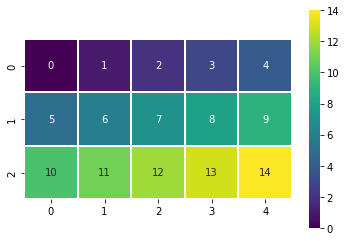

In [3]:
sns.heatmap(
    data=heat,
    annot=True,  #muestra los numeros
    cmap="viridis",  #usa el color map viridis
    linewidths=1,  #ancho de linea entre bloques
    square=True,  # hace cuadradas las celdas 
     )
plt.show()

#### Problem 1:
Has un heatmap de tamanio 3 por 3 con un "hot center" y uno de 4 por 4 con el color map "cubehelix"

In [4]:
#Do it here!





***

### Formating data for input on heatmap
Los graficos en 2D usan una o 3 matrices como entrada. Hemos visto que pasa si le damos solo una matriz. Si en vez de esto le damos 3, requerira:

- Los $X$ values, 
- Los $Y$ values y,
- Los $heat(X,Y)$ values.

Antes de que hagamos eso, comencemos haciendo matrices mas grandes para $X$ e $Y$.

[[0.  0.5 1.  1.5 2.  2.5]
 [0.  0.5 1.  1.5 2.  2.5]]


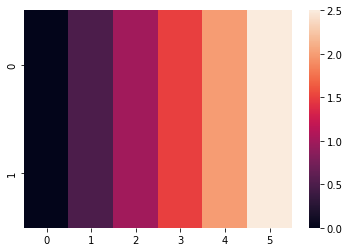

[[0 0 0 0 0 0]
 [5 5 5 5 5 5]]


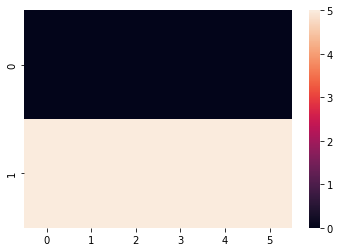

In [5]:
# Primero definimos el rango de los valores de X e Y
xrange=np.arange(0,3,0.5) # Que hace np.arange?
yrange=np.arange(0,10,5)

# Luego los volvemos matrices
X,Y=np.meshgrid(xrange,yrange)

print(X)
sns.heatmap(X)
plt.show()

print(Y)
sns.heatmap(Y)
plt.show()

Ahora que tenemos las coordenadas haremos una funcion para el heatmap

[[0.  0.5 1.  1.5 2.  2.5]
 [5.  5.5 6.  6.5 7.  7.5]]


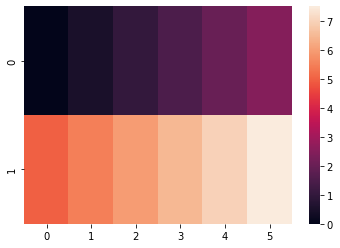

In [6]:
# Recuerda que las funciones se definen con def
def James(xmatrix,ymatrix):
    return xmatrix+ymatrix #Suma las matrices

# Hacemos el "heat" usando las coordenadas X e Y
Z=James(X,Y)

print(Z)
sns.heatmap(Z)
plt.show()

eso esta bueno y todo, pero esos ejes no son $X$ e $Y$. Para resolver esto vamos a usar un dataframe para hacer un pivot table

,x,y,z
0,0.0,0,0.0
1,0.5,0,0.5
2,1.0,0,1.0
3,1.5,0,1.5
4,2.0,0,2.0
5,2.5,0,2.5
6,0.0,5,5.0
7,0.5,5,5.5
8,1.0,5,6.0
9,1.5,5,6.5


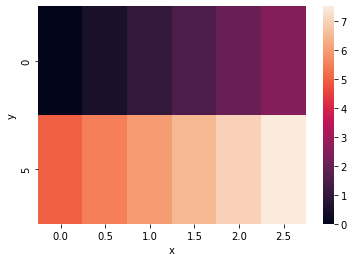

In [7]:
#Hacemos un diccionario  X, Y, Z values y darselo a un pandas df
Zdf=pd.DataFrame( {"x": X.flatten() ,"y":Y.flatten(),"z": Z.flatten()} );
display(Zdf)

# has una pivot table... porque pues toca
heat=Zdf.pivot_table(columns="x",index="y",values="z")

#muestra la grafica
sns.heatmap(heat)
plt.show()

#### Problem 2
Has la funcion "heat" definida por 
$$h=elevation(x,y)=100+2x-y$$ 
en el rango $20<x<30$ y $200<y<300$. (usa el tamanio de grilla que te paresca apropiado)

In [8]:
#Aqui hay unos pasos para seguir si no sabes por donde comenzar
#1 Haz una grilla/mesh para el rando indicado



#2 Define tu funcion y guarda en una variable tus valores de heat



#3 Haz el df y la pivot table



#4 Muestra tus resultados! 




***
### Vector fields with quiver
Bueno, que pasa si quieres poner una flecha en cada punto? a.k.a. un campo vectorial. En ese caso nesecitas la ubicacion $(x,y)$ de la flecha con direcion $(u,v)$.

Comencemos haciendo las componentes en $X$ e $Y$
Lets start by making the $X$ and $Y$ components as before

In [9]:
xrange=np.arange(0,10,0.5)
yrange=np.arange(0,5,0.5)

X,Y=np.meshgrid(xrange,yrange)

ahora definamos las componentes $U$ y $V$ del campo vectorial


In [10]:
#define functions of the vector at every (x,y) location
def Ucomp(xmatrix,ymatrix):
    return xmatrix

def Vcomp(xmatrix,ymatrix):
    return ymatrix*0

#asign them
U=Ucomp(X,Y)
V=Vcomp(X,Y)

finalmente, has un campo vectorial con la funcion `quiver`

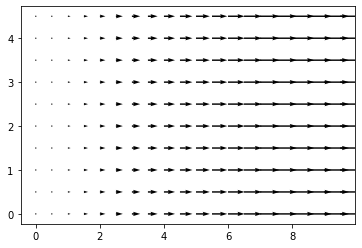

In [11]:
axis=plt.quiver(X,Y,U,V)
plt.show()

#### Problem 3
Haz un campo vectorial de flechas apuntando hacia arriba. (puedes escoger el rango que quieras)

In [12]:
#Create vector field here




***
### Exner equation: erosion and deposition of sediment

De acuerdo con Wikipedia: 

&emsp; "La ecuacion de Exner describe la conservacion de masa entre el sedimento de la cama de un canal y el sedimento que esta siendo transportado"

$$ \frac{\partial \eta}{\partial t}=-\frac{1}{\varepsilon_0}\nabla\cdot q_s$$

donde $\eta(x,y)=\eta$ es la elevacion y $q_s(x,y)=(U_q,V_q)$ es el campo vectorial de flujo de sedimento.

Vamos a tratar de entender la erosion y deposicion en una superficie plana donde el flujo de sedimento esta cambiando. Usaremos nuestro rango de valores de antes y haremos un nuevo flujo de sedimento

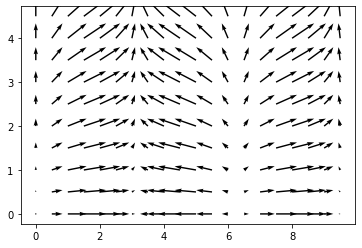

In [13]:
#define functions of the vector at every (x,y) location
def Uflux(xmatrix,ymatrix):
    return np.sin(xmatrix)*2
    
def Vflux(xmatrix,ymatrix):
    return ymatrix/3

#assing them
U=Uflux(X,Y)
V=Vflux(X,Y)

plt.quiver(X,Y,U,V,scale=30)
plt.show()

Aqui esta la funcion que usaremos para applicar la Exner equation al flujo, para encontrar los lugares donde haya erosion o deposicion.

In [14]:
#Exner function
def ExnerCalculator(X,Y,Uq,Vq,eps=1,dt=0.1):
    """
    ExnerCalculator takes in the X and Y locations and the vector field defined by U and V and returns the
    deposition/erosion happening at the current time.
    
    Parameters
    ----------
    X: matrix 
        x locations of the flux
    Y: matrix 
        y locations of the flux
    Uq: matrix 
        first components of the flux
    Vq: matrix 
        second components of the flux
    eps: float
        1-porosity of the bed
    dt: float
        time delta for the method

    Returns
    -------
    Xs: matrix 
        x locations with n-1 locations corresponding to dh
    Ys: matrix 
        y locations with n-1 locations corresponding to dh
    dh: matrix
        The difference in elevation in dt time units based on the flux
    """
    m,n=X.shape
    dx=X[0][1]-X[0][0]
    dy=Y[1][0]-Y[0][0]

    #gradient
    dUq=[ [Uq[j][i+1]-Uq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    dVq=[ [Vq[j+1][i]-Vq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    
    #exner
    dh=(-dt/eps)*(dUq/dx+dVq/dy)

    #new Xs and Ys
    Xs=np.array([ [X[j][i] for i in range(n-1) ] for j in range(m-1) ])
    Ys=np.array([ [Y[j][i] for i in range(n-1) ] for j in range(m-1) ])

    return Xs,Ys,dh

Y ahora le pasamos nuestro campo vectorial a esta funcion y graficamos un heatmap de erosion/deposition (los valores de $\Delta \eta$ ) 

<AxesSubplot:xlabel='x', ylabel='y'>

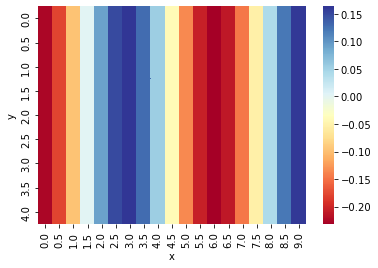

In [15]:
#use the function on the flux
newx,newy,deltah=ExnerCalculator(X,Y,U,V)

#plot the heatmap
erosion=pd.DataFrame( {"x": newx.flatten() ,"y":newy.flatten(),"erosion": deltah.flatten()} )
erosion_table=erosion.pivot_table(columns="x",index="y",values="erosion")
sns.heatmap(erosion_table,cmap="RdYlBu")

Veamos el quiver una vez mas para darle sentido a esto

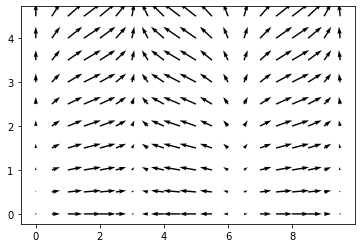

In [16]:
plt.figure()
plt.quiver(X,Y,U,V)
plt.show()

***
## Homework
1. Plot the vector field $q=(U,V)$ in the domain from $-1<x<1$ and $-1<y<1$ given by
     $$U=-X$$
     $$V=-Y$$

2. Use the `ExnerCalculator` function to display an erosional/deposition heatmap for the change in elevation $\Delta \eta$

3. Given the data of the three variables $weight, height$ and $age$ below, find the correlation matrix between them and make a heatmap of the correlation matrix. (check the correlation example in __[here](https://python-graph-gallery.com/90-heatmaps-with-various-input-format)__  )

4. Create a repository and put it up on your github.

In [17]:
weight=[162.22, 156.12, 169.31, 179.76, 173.12, 165.66, 166.61, 170.91, 156.67, 170.94]
height=[7.8954, 7.7507, 7.7312, 7.9815, 7.8738, 7.6802, 7.7422, 7.8297, 7.8992, 7.9033]
age=[32, 33, 22, 45, 33, 49, 36, 20, 41, 25]